In [70]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [71]:
src="data_varying_numpy_seed"

In [66]:
def get(thing, maxsv,seed):
    return np.load("data_varying_numpy_seed/{0}_maxsv={1}_seed={2}.npy".format(thing,maxsv,seed))

In [80]:
def get_logdict(maxsv, seed):
    with open(os.path.join(src, "logdict_maxsv={0}_seed={1}.json".format(maxsv,seed))) as f:
        return json.load(f)

In [87]:
with open(os.path.join(src,"metadata.json")) as f:
    metadata=json.load(f)
numseed=metadata['numseed']
numD = metadata['numD']
Dvals = metadata['Dvals']
assert numD==len(Dvals)

In [88]:
fidelities = np.empty((numD, numseed),dtype=object)
final_fidelities = np.empty((numD, numseed))

bond_dims = np.empty((numD, numseed),dtype=object)
final_bond_dims = np.empty((numD, numseed))

In [89]:
for ii in range(numD):
    for jj in range(numseed):
        logdict=get_logdict(Dvals[ii],jj)
        f=logdict["fidelity_mps"]
        bond_dim=logdict["max_bond_dim"]
        
        fidelities[ii,jj] = f
        final_fidelities[ii,jj] = f[-1]
        
        bond_dims[ii,jj]= bond_dim
        final_bond_dims[ii,jj] = bond_dim[-1]

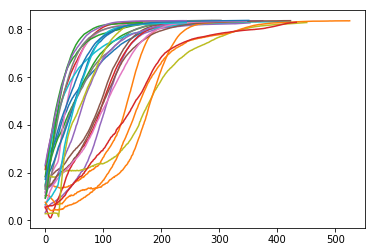

In [100]:
fig, ax = plt.subplots()
for jj in range(numseed):
    plt.plot(fidelities[0, jj])

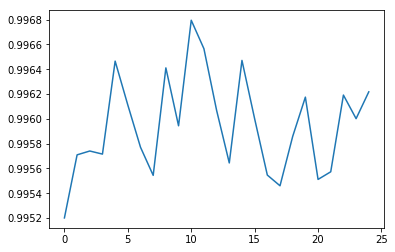

In [103]:
plt.plot(final_fidelities[2])

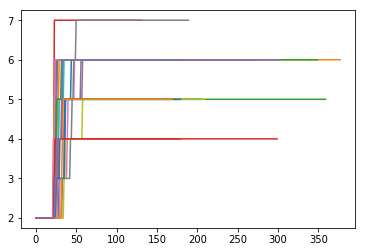

In [95]:
fig, ax = plt.subplots()
for jj in range(numseed):
    plt.plot(bond_dims[-1, jj])

In [96]:
fidelity_mean = np.mean(final_fidelities, axis=1)
fidelity_err = np.std(final_fidelities,axis=1) / np.sqrt(numseed)

bond_dim_mean = np.mean(final_bond_dims, axis=1)
bond_dim_err = np.std(final_bond_dims,axis=1) / np.sqrt(numseed)

<Container object of 3 artists>

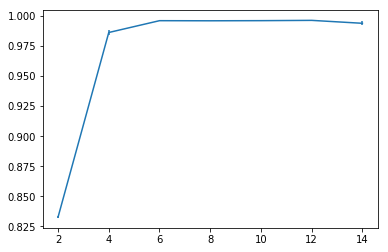

In [97]:
fig, ax = plt.subplots()
plt.errorbar(Dvals, fidelity_mean, yerr=fidelity_err)

<Container object of 3 artists>

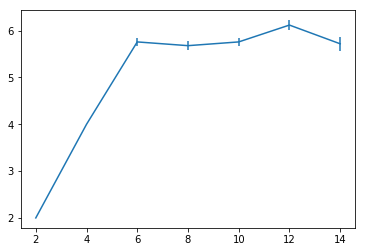

In [98]:
fig, ax = plt.subplots()
plt.errorbar(Dvals, bond_dim_mean, yerr=bond_dim_err)

Two things to note from this experiment: 
* fidelity 1 is reached well before the bond max bond dimension of the target state, which means some 'compression' is possible for this random state.
* Even in the cases where the max_sv is too low to describe the target state, the fidelity traces for different seeds converge on a single value. The SGD training is able to find a **best** description of the target state, and the output is well-defined.